In [8]:
import pandas as pd

# np.load("/content/drive/My Drive/ModelingAllLogs (1)/template2vec_hdfs_logs.npy",allow_pickle=True)
corpus = pd.read_csv("./dataset/all_data.csv")
corpus = corpus[[True if len(x) > 80 else False for x in corpus["text"].values]]


In [10]:
corpus["language"].unique()

array(['english', 'german', 'french', 'spanish', 'russian', 'greek',
       'finnish', 'portuguese', 'arabic', 'dutch', 'italian', 'turkish',
       'ignore', 'norwegian', 'chinese', 'polish', nan], dtype=object)

In [10]:
corpus_english = corpus[corpus["language"] == "english"]
corpus_english.shape

(15831, 54)

In [20]:
corpus_english.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'author', 'comments', 'country',
       'crawled', 'domain_rank', 'id', 'language', 'likes', 'main_img_url',
       'ord_in_thread', 'participants_count', 'published', 'replies_count',
       'shares', 'site_url', 'spam_score', 'text', 'thread_title', 'title',
       'type', 'uuid', 'caps_title', 'caps_thread', 'caps_text', 'title_len',
       'thread_len', 'text_len', 'excl_title', 'excl_thread', 'excl_text',
       'first_title', 'first_thread', 'first_text', 'second_title',
       'second_thread', 'second_text', 'third_title', 'third_thread',
       'third_text', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'negative', 'positive', 'first_all',
       'second_all', 'third_all'],
      dtype='object')

In [33]:
corpus_english.type.unique()

array(['real', 'fake'], dtype=object)

In [11]:
#we will use only the columns: text, title,type
corpus_news_att_filtered = corpus_english[["title","text","type"]]
corpus_news_att_filtered.head(2)

,title,text,type
0,"At Donald Trump<U+2019>s Properties, a Showcas...","They stood in line at Trump Tower, sometimes u...",real
1,Trump Foundation Tells New York It Has Stopped...,Donald J. Trump <U+2019>s foundation informed ...,real


In [13]:
fake_news_us_el = corpus_news_att_filtered[corpus_news_att_filtered.type == "fake"]
true_news_us_el = corpus_news_att_filtered[corpus_news_att_filtered.type == "real"]


Data analysis and visualization

In [5]:
print("Total fake news "+str(fake_news_us_el.shape[0]))
print("Total true news "+str(true_news_us_el.shape[0]))

Total fake news 10955
Total true news 4876


In [14]:
import re
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmetizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r"\w+")

text_prepared_fake_title = []
for t in fake_news_us_el.title.values.tolist():
    v= []
    for w in tokenizer.tokenize(t):
        w_lem = lemmetizer.lemmatize(w.lower())
        if not w_lem.isdigit() and w_lem not in stopwords.words('english') and not bool(re.search(r'\d', w_lem)):
            v.append(w_lem)
    text_prepared_fake_title.append(v)
    
text_prepared_true_titles = []
for t in true_news_us_el.title.values.tolist():
    v= []
    for w in tokenizer.tokenize(t):
        w_lem = lemmetizer.lemmatize(w.lower())
        if not w_lem.isdigit() and w_lem not in stopwords.words('english') and not bool(re.search(r'\d', w_lem)):
            v.append(w_lem)
    text_prepared_true_titles.append(v)

<h1>Sequence lenght determination</h1>

In [24]:
documents_lenghts_true = []
for t in text_prepared_true_titles:
    documents_lenghts_true.append(len(t))

    
documents_lenghts_fake = []
for t in text_prepared_fake_title:
    documents_lenghts_fake.append(len(t))   

documents_lenghts = documents_lenghts_true + documents_lenghts_fake
  
# for i in range(0,min(len(documents_lenghts_true),len(documents_lenghts_fake))):  
# #     documents_lenghts.append(documents_lenghts_true[i] + documents_lenghts_fake[i])

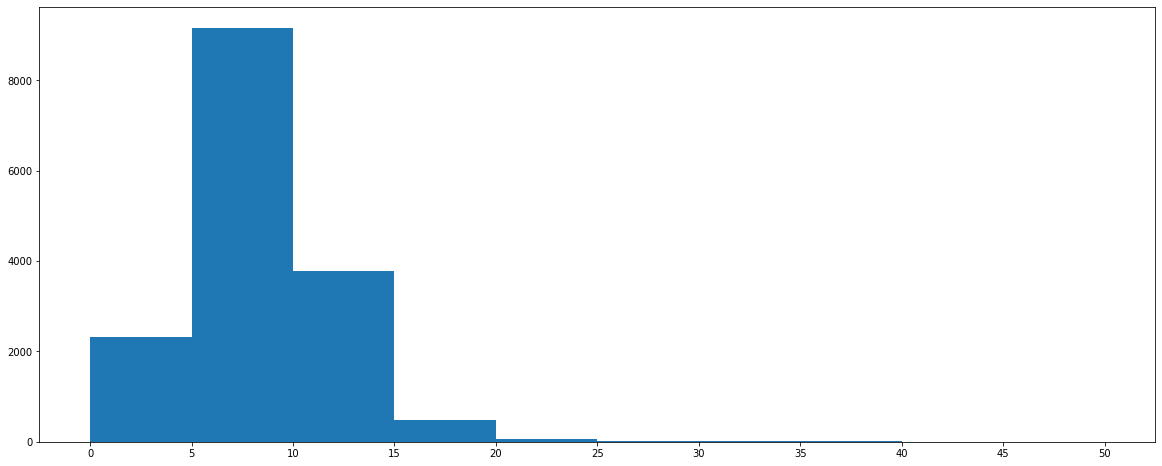

In [26]:
import numpy as np
import matplotlib.pyplot as plt

_ = plt.figure(figsize = (20,8))
plt.hist(documents_lenghts, bins=[0,5,10,15,20,25,30,40,50])
plt.xticks(np.arange(min(documents_lenghts), max(documents_lenghts)+1, 5.0))
plt.show()

In [20]:
documents_lenghts_fake

[]

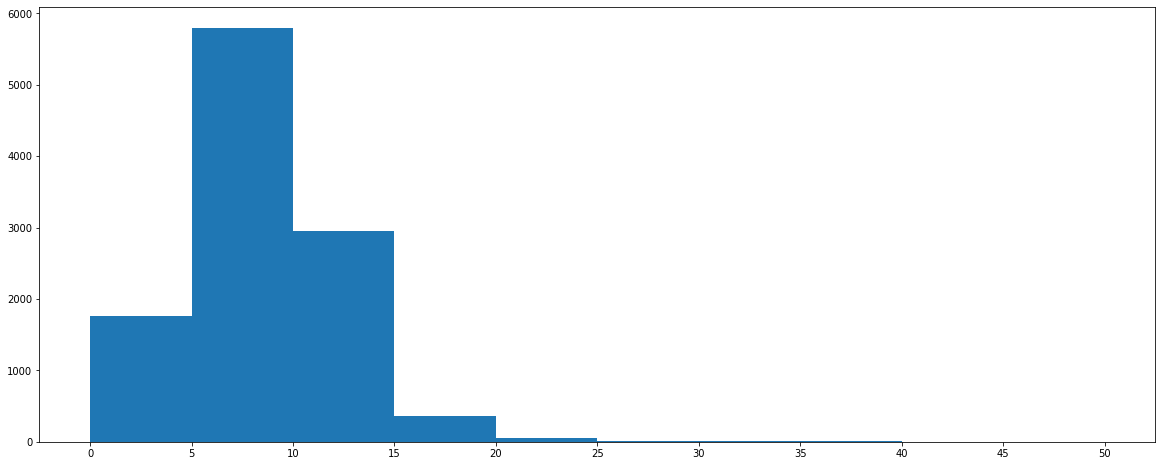

In [25]:
import numpy as np
import matplotlib.pyplot as plt

_ = plt.figure(figsize = (20,8))
plt.hist(documents_lenghts_fake, bins=[0,5,10,15,20,25,30,40,50])
plt.xticks(np.arange(min(documents_lenghts_fake), max(documents_lenghts_fake)+1, 5.0))
plt.show()

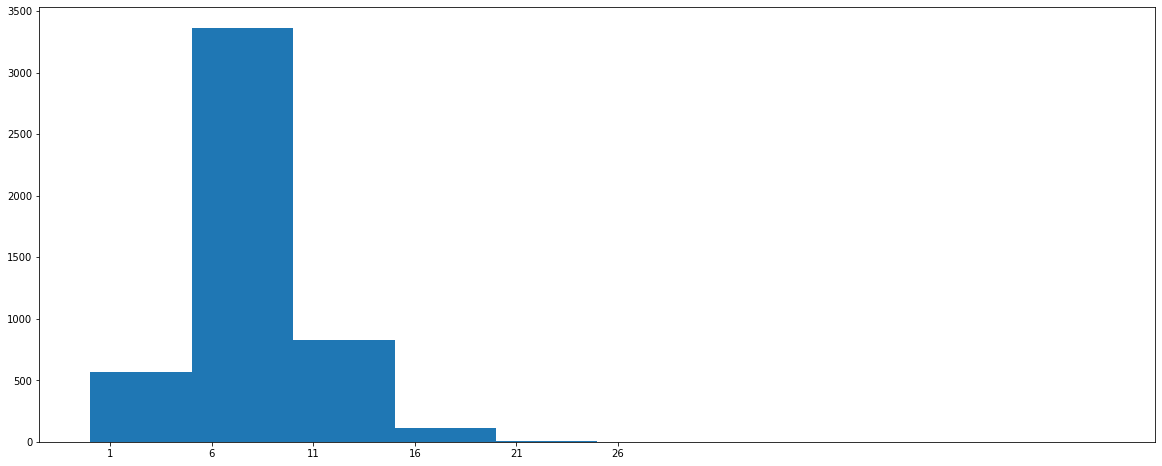

In [29]:
import numpy as np
import matplotlib.pyplot as plt

_ = plt.figure(figsize = (20,8))
plt.hist(documents_lenghts_true, bins=[0,5,10,15,20,25,30,40,50])
plt.xticks(np.arange(min(documents_lenghts_true), max(documents_lenghts_true)+1, 5.0))
plt.show()

In [31]:
import statistics as stat

print(stat.mean(documents_lenghts_true))
print(stat.median(documents_lenghts_true))
print(stat.stdev(documents_lenghts_true))

7.564602132895816
7.0
2.7761862912493065


In [32]:
print(stat.mean(documents_lenghts_fake))
print(stat.median(documents_lenghts_fake))
print(stat.stdev(documents_lenghts_fake))

8.020538566864445
8
3.766975197456964


In [33]:
stat.mean(documents_lenghts)

7.880108647590172

In [34]:
stat.median(documents_lenghts)

8

In [35]:
import numpy as np
np.quantile(documents_lenghts,q=0.75)

10.0

In [68]:
import numpy as np
np.quantile(documents_lenghts,q=0.25)

155.0

In [36]:
std = stat.stdev(documents_lenghts)

In [37]:
std

3.4981490116148812

In [38]:
# boundary = 324 + std*0.79
boundary = np.quantile(documents_lenghts,q=0.78)
print(f"Percetage of texts that has fewer of {boundary} words -all data --- {len([x for x in documents_lenghts if x <= boundary])*100/len(documents_lenghts)}")
print(f"Percetage of texts that has fewer of {boundary} words - fake corpus --- {len([x for x in documents_lenghts_fake if x <= boundary])*100/len(documents_lenghts_fake)}")
print(f"Percetage of texts that has fewer of {boundary} words - true corpus --- {len([x for x in documents_lenghts_true if x <= boundary])*100/len(documents_lenghts_true)}")

Percetage of texts that has fewer of 10.0 words -all data --- 80.94877139789021
Percetage of texts that has fewer of 10.0 words - fake corpus --- 77.38019169329074
Percetage of texts that has fewer of 10.0 words - true corpus --- 88.96636587366694


In [39]:
boundary = np.quantile(documents_lenghts,q=0.78)


print(f"Percetage of texts that has more than {boundary} words -all data --- {len([x for x in documents_lenghts if x > boundary])*100/len(documents_lenghts)}")
print(f"Percetage of texts that has more than {boundary} words - fake corpus --- {len([x for x in documents_lenghts_fake if x > boundary])*100/len(documents_lenghts_fake)}")
print(f"Percetage of texts that has more than {boundary} words - true corpus --- {len([x for x in documents_lenghts_true if x > boundary])*100/len(documents_lenghts_true)}")

Percetage of texts that has more than 10.0 words -all data --- 19.051228602109784
Percetage of texts that has more than 10.0 words - fake corpus --- 22.619808306709267
Percetage of texts that has more than 10.0 words - true corpus --- 11.03363412633306


In [41]:
official_lenght = int(boundary)
official_lenght

10

In [30]:
official_lenght = 10

<h1>Map word sequences to index sequences</h1>

Every word in the sequence is mapped to It's corresponding index or token ID in the given vocabulary (Word2Vec) 

In [16]:
all_titles = text_prepared_fake_title + text_prepared_true_titles
# labels = [1]*len(text_prepared_fake) + [0]*len(text_prepared_true)

In [25]:
save_pickle_file(labels,"./labels")
# labels = load_pickle_file("labels")

In [85]:
os.getcwd()

'/home/gorgiev_laze/NLP/Modeling-dataset-2'

In [87]:
!pip3 install gensim

The directory '/home/gorgiev_laze/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/gorgiev_laze/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 24.2MB 45kB/s  eta 0:00:01
    100% |████████████████████████████████| 122kB 10.1MB/s ta 0:00:01
    100% |████████████████████████████████| 1.4MB 962kB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 9.5MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 10.2MB/s ta 0:00:01
    100% |████████████████████████████████| 6.3MB 209kB/s eta 0:00:01
    100% |████████████████████████████████| 552kB 2.4MB/s eta 0:00:01
  Run

In [5]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# word2vec = KeyedVectors.load_word2vec_format('../../new_disk/GoogleNews-vectors-negative300.bin', binary=True)
new_model_w2v = KeyedVectors.load_word2vec_format("./word2vecUpdateModel/updatedWord2Vec.bin",binary=True)

In [7]:
len(new_model_w2v.vocab)

3001066

In [17]:
not_in_wv = set()
for sentence in all_titles:
    for w in sentence:
        if w not in new_model_w2v.vocab:
            not_in_wv.add(w)


In [18]:
len(not_in_wv)

1742

In [24]:
from nltk.corpus import words
existing_words = []
non_existing_words = []
i=0
for w in not_in_wv:
    if w in words.words():
        existing_words.append(w)
    else:
        non_existing_words.append(w)

In [25]:
print(len(set(existing_words)))
len(set(non_existing_words))

4


1738

In [26]:
existing_words

['arango', 'archil', 'cornwallis', 'epicly']

Because it's pointless to update the Word2Vec model for just 4 words, we will consider them as unknown words

In [27]:
non_existing_words = set(non_existing_words).union(set(existing_words))

the non-existing words will be replaced with the word 'unknown_word' and will be represented as vector(unknown) + vector(word)

In [31]:
all_titles_repl = []
i=0
for seq in all_titles:
    i+=1
    new_seq = []
    for x in seq[:official_lenght]:
        if x not in non_existing_words:
            new_seq.append(x)
        else:
            new_seq.append("unknown_word")
    all_titles_repl.append(new_seq)
    
# [[x if x not in non_existing_words else 'unknown_word' for x in l[:official_lenght]] for l in all_text]

In [32]:
# all_text_repl = load_pickle_file("text_data_prepared.pkl")
save_pickle_file(all_titles_repl,"./WithTittles/titles_data_prepared.pkl")

In [6]:
unknown_word_vector_repr = word2vec.get_vector('unknown') + word2vec.get_vector('word')
v1 = word2vec.get_vector('unknown')
v2 = word2vec.get_vector('word')

In [8]:
new_model_w2v.wv.save_word2vec_format("./word2vecUpdateModel/updatedWord2Vec.bin",binary=True)

<h2>Create embeding matrix</h2>

In [34]:
import numpy as np
#creating empty word2index dictionary
word2index = {}
#creating empty embeding matrix
vocab = new_model_w2v.wv.vocab

embeding_matrix = np.zeros((len(vocab)+1,300))

#filling the embeding matrix and word2index dictionary
for idx,word in enumerate(list(vocab.keys())):
    word2index[word] = idx
    embeding_matrix[idx] = new_model_w2v.wv.get_vector(word)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':


In [35]:
padding_value = len(embeding_matrix)-1
#dummy vector for the padding value = 3001066
embeding_matrix[padding_value] = np.zeros(300)

In [36]:
padding_value

3001066

In [37]:
#save embeding matrix and word2index (we do not need anymore word2vec so it does not need to be loaded in memory)
save_pickle_file(word2index,"./WithTittles/word2index_titles")
save_pickle_file(embeding_matrix,"./WithTittles/embeding_matrix",protocol = 4)
# del word2vec
del new_model_w2v

In [3]:
word2index = load_pickle_file("./WithTittles/word2index_titles")
embeding_matrix = load_pickle_file("./WithTittles/embeding_matrix",protocol = 4)

In [38]:
len(embeding_matrix)

3001067

<h2>Map sequences of words to sequences of indexes</h2>

In [39]:
index_sequences = []
for sequence in all_titles_repl:
    new_sequence = []
    for w in sequence:
        new_sequence.append(word2index[w])
    index_sequences.append(np.array(new_sequence))
save_pickle_file(index_sequences,"./WithTittles/index_sequences_titles.pkl")

In [2]:
import pickle
def save_pickle_file(file,file_path,protocol=None):
    with open(file_path,"wb") as f:
        if protocol:
            pickle.dump(file,f,protocol = protocol)
        else:
            pickle.dump(file,f)

def load_pickle_file(file_path, protocol=None):
     with open(file_path,"rb") as f:
        if protocol:
            return pickle.load(f)
        else:
            return pickle.load(f)
